In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change directory
%cd /content/drive/My Drive/Colab Notebooks/healthcare analytics

/content/drive/My Drive/Colab Notebooks/healthcare analytics


In [3]:
!ls

 AfterPCA1.csv		    inbetween.gsheet
 AfterPCA.csv		    PatientPortalAnalysis.pptx
 Anisha_score.csv	    PatientPortalUsage.ipynb
 CKD.ipynb		    ProstrateCancer.ipynb
 CKD_trn.csv		    purchase_fre_job.png
 CKD_tst.csv		   'Survival Analysis ProstrateCancer.ipynb'
 Dataset.csv		    sympotms.csv
 Final_file.csv		    sympotms.gsheet
 FinalRaw.csv		    sympotms.xlsx
 final_score.csv	    TimeSeries.ipynb
 hints5_cycle2_public.csv   training_data.csv
 inbetween.csv


In [36]:
pip install lifelines

     |████████████████████████████████| 348 kB 6.0 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=9b4686e0b7be38b66d141e23c8e695f0a64aae2f53aba9bc5ba9f6f9db34603c
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from lifelines import KaplanMeierFitter

In [13]:
dfall = pd.read_csv('training_data.csv')
dfall

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,...,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,1,Jun-05,4.0,T1c,N0,M0,I,86.0,4.0,66.0,...,U03,0,0,1,1,0,1,1,1,0
1,2,Feb-06,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,...,"U06,S07",1,1,1,0,0,0,1,1,0
2,3,Mar-06,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,...,"U01,U02,U03,S10",1,1,0,0,1,1,1,1,1
3,4,Feb-05,8.0,T2b,N0,M0,IIB,86.0,3.0,69.0,...,"U01,U02,S10,O11",0,0,0,1,0,1,1,0,0
4,5,Dec-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,...,"U01,U03,U05,S07",1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15380,15381,Jun-05,7.0,T3c,N0,M0,III,72.0,4.0,70.0,...,"U03,S07",0,0,1,0,1,0,1,0,0
15381,15382,Dec-04,7.0,T4,N0,M0,IV,77.0,4.0,NaN,...,"U02,S07,O11",1,0,0,0,0,0,0,1,0
15382,15383,Jan-01,8.0,T3c,N0,M0,III,64.0,4.0,NaN,...,"U01,U03",1,1,0,0,0,0,1,1,0
15383,15384,Jan-03,10.0,T4,N1,M1a,IV,79.0,4.0,69.0,...,"S04,P01",0,1,1,1,1,0,1,1,0


In [14]:
df = pd.read_csv('sympotms.csv')
l = list(df["symptoms"].unique())
cols = []
for item in l:
  cols= cols + item.split(',')

print(set(cols))


{'S04', 'S07', 'U03', 'U01', 'U02', 'P02', 'U06', 'O11', 'S10', 'P01', 'O01', 'U05'}


# Data Transformation

In [15]:

sof_df=pd.DataFrame(df)
sof_df.symptoms=sof_df.symptoms.str.replace(' ','')
sof_df.symptoms.str.get_dummies(sep=',')

,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,1,1,1,0,0
3,0,1,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,0,0,0,0,0,0,0,1,0,0,0,1
57,0,1,0,1,0,0,0,0,1,1,0,0
58,0,1,0,0,0,0,0,0,1,0,0,1
59,1,0,0,0,0,0,0,1,1,0,0,0


In [16]:
df_s=sof_df.symptoms.str.get_dummies(sep=',')
df_s

,O01,O11,P01,P02,S04,S07,S10,U01,U02,U03,U05,U06
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,1,1,1,0,0
3,0,1,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,0,0,0,0,0,0,0,1,0,0,0,1
57,0,1,0,1,0,0,0,0,1,1,0,0
58,0,1,0,0,0,0,0,0,1,0,0,1
59,1,0,0,0,0,0,0,1,1,0,0,0


In [17]:
df = pd.concat([dfall, df_s], axis=1)

In [18]:
df.shape

(15385, 45)

In [19]:
df.drop(['id','symptoms'], axis = 1, inplace = True)

In [20]:
df.shape

(15385, 43)

In [21]:
df.columns

Index(['diagnosis_date', 'gleason_score', 't_score', 'n_score', 'm_score',
       'stage', 'age', 'race', 'height', 'weight', 'family_history',
       'first_degree_history', 'previous_cancer', 'smoker', 'side',
       'tumor_diagnosis', 'tumor_6_months', 'tumor_1_year', 'psa_diagnosis',
       'psa_6_months', 'psa_1_year', 'tea', 'rd_thrpy', 'h_thrpy', 'chm_thrpy',
       'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'survival_1_year',
       'survival_7_years', 'O01', 'O11', 'P01', 'P02', 'S04', 'S07', 'S10',
       'U01', 'U02', 'U03', 'U05', 'U06'],
      dtype='object')

In [22]:
df.head

<bound method NDFrame.head of       diagnosis_date  gleason_score t_score n_score m_score stage   age  race  \
0             Jun-05            4.0     T1c      N0      M0     I  86.0   4.0   
1             Feb-06            8.0     T3a      N1      M0    IV  66.0   2.0   
2             Mar-06            9.0     T1a      N0      M0   IIB  84.0   4.0   
3             Feb-05            8.0     T2b      N0      M0   IIB  86.0   3.0   
4             Dec-01            8.0      T4      N0      M0    IV  78.0   4.0   
...              ...            ...     ...     ...     ...   ...   ...   ...   
15380         Jun-05            7.0     T3c      N0      M0   III  72.0   4.0   
15381         Dec-04            7.0      T4      N0      M0    IV  77.0   4.0   
15382         Jan-01            8.0     T3c      N0      M0   III  64.0   4.0   
15383         Jan-03           10.0      T4      N1     M1a    IV  79.0   4.0   
15384         Jan-04            9.0     T3b      N0      M0   III  81.0   4.0  

## TNM Staging

In [23]:
df['TNM_sc'] = ''

# df.loc[((df["t_score"] == "T1c") & (df["gleason_score"] == 4.0)),"TNM_sc"] = 1

df.loc[((df["t_score"] == "T1a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'
df.loc[((df["t_score"] == "T1b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'
df.loc[((df["t_score"] == "T1c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'

df.loc[((df["t_score"] == "T2a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'
df.loc[((df["t_score"] == "T2b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'
df.loc[((df["t_score"] == "T2c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & (df["psa_diagnosis"] < 10.0 )),"TNM_sc"] = 'I'

df.loc[df.TNM_sc == "I"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,...,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
0,Jun-05,4.0,T1c,N0,M0,I,86.0,4.0,66.0,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,I
24,Jun-06,5.0,T2c,N0,M0,IIB,70.0,4.0,69.0,197.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,I
26,Jul-06,5.0,T2c,N0,M0,IIB,71.0,2.0,69.0,249.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,I
34,Feb-01,6.0,T1b,N0,M0,I,73.0,4.0,70.0,177.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,I
36,Aug-06,6.0,T2b,N0,M0,IIA,78.0,4.0,69.0,163.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15293,Jul-05,6.0,T1a,N0,M0,I,85.0,4.0,67.0,144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
15297,Jul-04,6.0,T2a,N0,M0,I,48.0,1.0,71.0,163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
15317,Apr-06,4.0,T1b,N0,M0,I,85.0,2.0,68.0,167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
15367,Jun-06,6.0,T2a,N0,M0,I,64.0,1.0,69.0,183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I


In [24]:
df.loc[((df["t_score"] == "T1a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'
df.loc[((df["t_score"] == "T1b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'
df.loc[((df["t_score"] == "T1c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'

df.loc[((df["t_score"] == "T2a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'
df.loc[((df["t_score"] == "T2b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'
df.loc[((df["t_score"] == "T2c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 6.0) & ((df["psa_diagnosis"] >= 10.0) & (df["psa_diagnosis"] < 20.0))),"TNM_sc"] = 'IIA'

df.loc[df.TNM_sc == "IIA"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,...,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
5,Jul-01,3.0,T1a,N0,M0,IIA,75.0,4.0,69.0,166.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,IIA
29,Aug-05,3.0,T2a,N0,M0,IIA,81.0,4.0,70.0,169.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,IIA
77,Jan-03,6.0,T1b,N0,M0,IIA,77.0,4.0,70.0,154.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
88,Mar-05,5.0,T2a,N0,M0,IIA,74.0,1.0,71.0,158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
98,Nov-05,6.0,T1c,N0,M0,IIA,76.0,4.0,69.0,223.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15236,Dec-03,6.0,T1b,N0,M0,IIA,70.0,4.0,70.0,206.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
15249,Jun-05,6.0,T1b,N0,M0,IIA,74.0,2.0,68.0,164.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
15307,Jan-06,6.0,T1a,N0,M0,IIA,87.0,2.0,68.0,177.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA
15348,Aug-06,6.0,T2a,N0,M0,IIA,71.0,4.0,69.0,178.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIA


In [25]:
df.loc[((df["t_score"] == "T1a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'
df.loc[((df["t_score"] == "T1b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'
df.loc[((df["t_score"] == "T1c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'

df.loc[((df["t_score"] == "T2a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'
df.loc[((df["t_score"] == "T2b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'
df.loc[((df["t_score"] == "T2c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] == 7.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIB'
df.loc[df.TNM_sc == "IIB"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,...,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
9,Nov-04,7.0,T1a,N0,M0,IIA,83.0,2.0,68.0,163.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,IIB
11,Jan-06,7.0,T2b,N0,M0,IIA,80.0,4.0,70.0,209.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,IIB
12,Aug-03,7.0,T2c,N0,M0,IIB,70.0,4.0,70.0,193.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,IIB
20,Mar-04,7.0,T1c,N0,M0,IIA,87.0,4.0,69.0,193.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,IIB
23,Oct-05,7.0,T1c,N0,M0,IIA,78.0,2.0,69.0,219.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,IIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15273,Nov-00,7.0,T1c,N0,M0,IIA,84.0,4.0,69.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIB
15312,Sep-02,7.0,T1a,N0,M0,IIA,91.0,1.0,67.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIB
15316,Aug-05,7.0,T2c,N0,M0,IIB,NaN,2.0,70.0,179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIB
15325,Jan-05,7.0,T2c,N0,M0,IIB,80.0,2.0,69.0,146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIB


In [26]:
df.loc[((df["t_score"] == "T1a") & (df["n_score"] == "N0") & (df["TNM_sc"] == '') & (df["m_score"] == "M0") & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'
df.loc[((df["t_score"] == "T1b") & (df["n_score"] == "N0") & (df["TNM_sc"] == '') & (df["m_score"] == "M0") & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'
df.loc[((df["t_score"] == "T1c") & (df["n_score"] == "N0") & (df["TNM_sc"] == '') & (df["m_score"] == "M0") & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'

df.loc[((df["t_score"] == "T2a") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["TNM_sc"] == '') & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'
df.loc[((df["t_score"] == "T2b") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["TNM_sc"] == '') & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'
df.loc[((df["t_score"] == "T2c") & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["TNM_sc"] == '') & (df["gleason_score"] == 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIC'
df.loc[df.TNM_sc == "IIC"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,...,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
6,Oct-05,8.0,T1b,N0,M0,IIB,85.0,4.0,67.0,166.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,IIC
32,Sep-06,8.0,T2a,N0,M0,IIB,83.0,3.0,68.0,164.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,IIC
71,Aug-01,8.0,T2a,N0,M0,IIB,63.0,4.0,71.0,220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
81,Mar-06,8.0,T1a,N0,M0,IIB,NaN,4.0,70.0,165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
82,Feb-03,8.0,T2c,N0,M0,IIB,77.0,4.0,69.0,183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288,Aug-05,8.0,T2a,N0,M0,IIB,80.0,2.0,70.0,174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
15313,Mar-04,8.0,T2b,N0,M0,IIB,73.0,4.0,71.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
15360,Apr-05,8.0,T2c,N0,M0,IIB,88.0,4.0,69.0,174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC
15361,Sep-05,8.0,T1a,N0,M0,IIB,79.0,3.0,69.0,179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIC


In [27]:
df.loc[((df["t_score"] == "T1a") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'
df.loc[((df["t_score"] == "T1b") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'
df.loc[((df["t_score"] == "T1c") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'

df.loc[((df["t_score"] == "T2a") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'
df.loc[((df["t_score"] == "T2b") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'
df.loc[((df["t_score"] == "T2c") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] >= 20.0)),"TNM_sc"] = 'IIIA'
df.loc[df.TNM_sc == "IIIA"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,...,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
982,Aug-00,7.0,T1b,N0,M0,IIB,80.0,4.0,67.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
1784,Nov-04,3.0,T1a,N0,M0,IIB,80.0,4.0,71.0,194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
2232,Nov-04,7.0,T1a,N0,M0,IIB,64.0,4.0,71.0,237.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
2307,Sep-06,7.0,T2a,N0,M0,IIB,74.0,4.0,69.0,197.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
2737,Apr-01,3.0,T2c,N0,M0,IIB,72.0,4.0,NaN,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
3212,May-05,8.0,T2c,N0,M0,IIB,67.0,4.0,69.0,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
3664,Feb-00,7.0,T2b,N0,M0,IIB,59.0,4.0,72.0,185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
3814,Feb-06,7.0,T2c,N0,M0,IIB,71.0,4.0,70.0,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
4284,Jan-05,7.0,T2a,N0,M0,IIB,83.0,4.0,69.0,195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA
4388,Jul-05,8.0,T2b,N0,M0,IIB,81.0,4.0,71.0,214.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIA


In [28]:
df.loc[((df["t_score"] == "T3a") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'
df.loc[((df["t_score"] == "T3b") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'
df.loc[((df["t_score"] == "T3c") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'

df.loc[((df["t_score"] == "T4") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0)),"TNM_sc"] = 'IIIB'
# df.loc[((df["t_score"] == "T2b") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIIB'
# df.loc[((df["t_score"] == "T2c") & (df["TNM_sc"] == '') & (df["n_score"] == "N0") & (df["m_score"] == "M0") & (df["gleason_score"] <= 8.0) & (df["psa_diagnosis"] < 20.0)),"TNM_sc"] = 'IIIB'
df.loc[df.TNM_sc == "IIIB"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,...,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
4,Dec-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,201.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,IIIB
7,Dec-05,8.0,T4,N0,M0,IV,78.0,4.0,70.0,157.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,IIIB
8,Jan-04,6.0,T3b,N0,M0,III,75.0,1.0,69.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,IIIB
10,Nov-04,6.0,T3c,N0,M0,III,59.0,4.0,70.0,215.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,IIIB
13,Oct-06,7.0,T4,N0,M0,IV,74.0,4.0,70.0,175.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,IIIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15365,Aug-01,6.0,T3b,N0,M0,III,87.0,4.0,68.0,156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIB
15371,Aug-01,7.0,T3b,N0,M0,III,80.0,4.0,68.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIB
15380,Jun-05,7.0,T3c,N0,M0,III,72.0,4.0,70.0,178.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIB
15381,Dec-04,7.0,T4,N0,M0,IV,77.0,4.0,NaN,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIB


In [29]:
df.loc[((df["n_score"] == "N0") & (df["TNM_sc"] == '') & (df["m_score"] == "M0") & ((df["gleason_score"] == 9.0) | (df["gleason_score"] == 10.0))),"TNM_sc"] = 'IIIC'

df.loc[df.TNM_sc == "IIIC"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,...,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
2,Mar-06,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,NaN,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,IIIC
17,Sep-03,9.0,T2c,N0,M0,IIB,70.0,4.0,71.0,178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,IIIC
31,Oct-03,9.0,T2c,N0,M0,IIB,70.0,4.0,69.0,175.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,IIIC
39,May-06,10.0,T2c,N0,M0,IIB,62.0,2.0,72.0,211.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,IIIC
60,Nov-06,10.0,T4,N0,M0,IV,89.0,2.0,68.0,173.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,IIIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15356,Jun-04,10.0,T3b,N0,M0,III,NaN,4.0,70.0,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIC
15364,Jan-04,10.0,T4,N0,M0,IV,68.0,4.0,70.0,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIC
15375,Oct-05,9.0,T1b,N0,M0,IIB,59.0,2.0,71.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIC
15376,May-01,9.0,T1a,N0,M0,IIB,71.0,4.0,69.0,168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IIIC


In [30]:
df.loc[((df["n_score"] == "N1") & (df["TNM_sc"] == '')),"TNM_sc"] = 'IVA'
df.loc[df.TNM_sc == "IVA"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,...,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
1,Feb-06,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,174.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,IVA
14,Dec-01,8.0,T4,N1,M0,IV,88.0,4.0,NaN,167.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,IVA
15,Jun-05,4.0,T4,N1,M0,IV,90.0,4.0,68.0,160.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IVA
21,May-04,6.0,T3c,N1,M0,IV,59.0,4.0,NaN,192.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,IVA
22,Apr-06,9.0,T4,N1,M0,IV,79.0,4.0,67.0,167.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,IVA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,Aug-05,9.0,T3a,N1,M0,IV,90.0,4.0,68.0,177.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVA
15362,Sep-06,3.0,T4,N1,M0,IV,75.0,4.0,NaN,159.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVA
15363,Feb-01,10.0,T3a,N1,M0,IV,92.0,4.0,67.0,161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVA
15379,Oct-06,6.0,T3c,N1,M1a,IV,81.0,4.0,69.0,149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVA


In [31]:
df.loc[(((df["m_score"] == "M1a") | (df["m_score"] == "M1a") | (df["m_score"] == "M1a"))& (df["TNM_sc"] == '')),"TNM_sc"] = 'IVB'
df.loc[df.TNM_sc == "IVB"]

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,...,P02,S04,S07,S10,U01,U02,U03,U05,U06,TNM_sc
91,Dec-04,9.0,T4,NX,M1a,IV,80.0,4.0,71.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
124,Apr-03,9.0,T2c,NX,M1a,IV,75.0,4.0,NaN,197.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
379,Jul-06,8.0,T4,NX,M1a,IV,89.0,4.0,69.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
398,Jan-06,5.0,T1c,NX,M1a,IV,75.0,4.0,68.0,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
766,Aug-01,7.0,T2c,NX,M1a,IV,82.0,2.0,NaN,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,Aug-04,8.0,T4,NX,M1a,IV,89.0,4.0,66.0,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
15125,Nov-00,9.0,T2b,NX,M1a,IV,74.0,4.0,69.0,176.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
15132,Aug-05,10.0,T4,NX,M1a,IV,82.0,3.0,68.0,174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB
15263,Aug-04,9.0,T2b,NX,M1a,IV,82.0,4.0,69.0,157.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IVB


In [32]:
# for the TNM_sc still blank, replace the values - some 2000 rows
df.loc[(df["TNM_sc"] == ''),"TNM_sc"] = df["stage"]


## Diff in tumour size, age, height, weight

In [39]:
df['diff6'] = df['tumor_diagnosis'] - df['tumor_6_months']
df['diff12'] = df['tumor_diagnosis'] - df['tumor_1_year']

In [40]:
df['BMI'] = df['weight']/df['height']

In [41]:
df.age

0        86.0
1        66.0
2        84.0
3        86.0
4        78.0
         ... 
15380    72.0
15381    77.0
15382    64.0
15383    79.0
15384    81.0
Name: age, Length: 15385, dtype: float64

In [42]:
df['age']=pd.to_numeric(df['age'],errors='coerce')

In [45]:
df.dtypes

diagnosis_date           object
gleason_score           float64
t_score                  object
n_score                  object
m_score                  object
stage                    object
age                     float64
race                    float64
height                  float64
weight                  float64
family_history          float64
first_degree_history    float64
previous_cancer         float64
smoker                  float64
side                     object
tumor_diagnosis         float64
tumor_6_months          float64
tumor_1_year            float64
psa_diagnosis           float64
psa_6_months            float64
psa_1_year              float64
tea                     float64
rd_thrpy                  int64
h_thrpy                   int64
chm_thrpy                 int64
cry_thrpy                 int64
brch_thrpy                int64
rad_rem                   int64
multi_thrpy               int64
survival_1_year           int64
survival_7_years          int64
O01     

Symtoms as 0 or 1 - if there are more than 1 symtoms then 1 else 0

In [47]:
df['sym'] = df['U01'] + df['U02'] + df['U03'] + df['U05'] + df['U06'] + df['O01'] + df['O11'] + df['P01'] + df['P02'] + df['S04'] + df['S07'] + df['S10']

In [51]:
df['sym']=df['sym'].apply(lambda x: 1 if x > 1 else 0)

In [54]:
df['sym']

0        0
1        0
2        0
3        0
4        0
        ..
15380    0
15381    0
15382    0
15383    0
15384    0
Name: sym, Length: 15385, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15385 entries, 0 to 15384
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis_date        15385 non-null  object 
 1   gleason_score         15065 non-null  float64
 2   t_score               15385 non-null  object 
 3   n_score               15385 non-null  object 
 4   m_score               15385 non-null  object 
 5   stage                 15385 non-null  object 
 6   age                   14637 non-null  float64
 7   race                  15220 non-null  float64
 8   height                14021 non-null  float64
 9   weight                14068 non-null  float64
 10  family_history        13799 non-null  float64
 11  first_degree_history  13799 non-null  float64
 12  previous_cancer       13799 non-null  float64
 13  smoker                13799 non-null  float64
 14  side                  15385 non-null  object 
 15  tumor_diagnosis    

In [56]:
# # now we can drop these 5 columns + 3 columns
df.drop(['gleason_score', 't_score', 'n_score','psa_diagnosis','m_score'], axis = 1, inplace = True)
df.drop(['tumor_diagnosis', 'tumor_6_months', 'tumor_1_year'], axis = 1, inplace = True)
df.drop(['height', 'weight'],axis=1,inplace=True)

In [59]:
df.drop(['O01', 'O11', 'P01', 'P02', 'S04', 'S07', 'S10',
       'U01', 'U02', 'U03', 'U05', 'U06'], axis = 1, inplace = True)

In [60]:
df.columns

Index(['diagnosis_date', 'stage', 'age', 'race', 'family_history',
       'first_degree_history', 'previous_cancer', 'smoker', 'side',
       'psa_6_months', 'psa_1_year', 'tea', 'rd_thrpy', 'h_thrpy', 'chm_thrpy',
       'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'survival_1_year',
       'survival_7_years', 'TNM_sc', 'diff6', 'diff12', 'BMI', 'sym'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15385 entries, 0 to 15384
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis_date        15385 non-null  object 
 1   stage                 15385 non-null  object 
 2   age                   14637 non-null  float64
 3   race                  15220 non-null  float64
 4   family_history        13799 non-null  float64
 5   first_degree_history  13799 non-null  float64
 6   previous_cancer       13799 non-null  float64
 7   smoker                13799 non-null  float64
 8   side                  15385 non-null  object 
 9   psa_6_months          5882 non-null   float64
 10  psa_1_year            12868 non-null  float64
 11  tea                   13799 non-null  float64
 12  rd_thrpy              15385 non-null  int64  
 13  h_thrpy               15385 non-null  int64  
 14  chm_thrpy             15385 non-null  int64  
 15  cry_thrpy          

In [98]:
df.columns

Index(['diagnosis_date', 'stage', 'age', 'race', 'family_history',
       'first_degree_history', 'previous_cancer', 'smoker', 'side',
       'psa_6_months', 'psa_1_year', 'tea', 'rd_thrpy', 'h_thrpy', 'chm_thrpy',
       'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'survival_1_year',
       'survival_7_years', 'TNM_sc', 'diff6', 'diff12', 'BMI', 'sym',
       'tenure'],
      dtype='object')

In [101]:
df1 = df[['rd_thrpy','rad_rem','survival_1_year', 'age','stage', 'TNM_sc', 'survival_7_years', 'race','psa_6_months', 'psa_1_year']]

In [103]:
df1.to_csv("Final_Tenure.csv")

In [ ]:
#IMP Features based on previous RFE - ['rd_thrpy','rad_rem','survival_1_year','stage_I','stage_IIA','TNM_sc_III',
#'TNM_sc_IIIB','TNM_sc_IIIC','TNM_sc_IVA','TNM_sc_IVB','more_than65','survival_7_years']
# also include race = 4 or not

#Hence we will keep - 'rd_thrpy','rad_rem','survival_1_year', 'age','stage', 'TNM_sc', 'survival_7_years', 'race4'
# keep 'psa_6_months', 'psa_1year' - to find the time

# Survival Analysis - Defining Tenure

Survival probability is the probability that an individual (e.g., patient) survives from the time origin (e.g., diagnosis of cancer) to a specified future time t.  For example, S(200) = 0.7 means that after 200 days has passed since the diagnosis of cancer, the patient’s survival probability has dropped to 0.7


The hazard probability, denoted by h(t), is the probability that an individual(e.g., patient) who is under observation at a time t has an event(e.g., death) at that time. For example, If h(200) = 0.7, then it means that the probability of that person being dead at time t=200 days is 0.7.

The Kaplan–Meier estimator is a non-parametric statistic used to estimate the survival function (probability of a person surviving) from lifetime data. In medical research, it is often used to measure the fraction of patients living for a certain amount of time after treatment. For example, Calculating the amount of time(year, month, day) certain patient lived after he/she was diagnosed with cancer or his treatment starts.

In [96]:
# considering tenure for 84 months, 12 months or if psa_6months is NOT NA then survival = 6 months random (1-11){if survival 1 year = 0} or random (12-83) {if survival 7 years = 0}
## import random 
#df['tenure'] = ''
# df.loc[(df['survival_7_years']==1),"tenure"] = 84
# #df.loc[((df['survival_1_year']==1) & (df['survival_7_years']==0) & df['tenure'] == ''),"tenure"] = 12
# df.loc[((df['survival_7_years']==0) & (df['survival_1_year']==1) & (df['tenure'] == '')),"tenure"] = random.randint(13,83)
# df.loc[((df['survival_7_years']==0) & (df['survival_1_year']==0) & (df['psa_6_months'] != '') & (df['tenure'] == '')),"tenure"] = random.randint(6,11)


In [151]:
df = pd.read_csv('Final_Tenure1.csv')

In [152]:
df.drop(['psa_6_months','psa_1_year'],axis=1,inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15385 entries, 0 to 15384
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rd_thrpy          15385 non-null  int64  
 1   rad_rem           15385 non-null  int64  
 2   survival_1_year   15385 non-null  int64  
 3   age               14637 non-null  float64
 4   stage             15385 non-null  object 
 5   TNM_sc            15385 non-null  object 
 6   survival_7_years  15385 non-null  int64  
 7   race4             15385 non-null  int64  
 8   time              15385 non-null  int64  
 9   dead              15385 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.2+ MB


In [154]:
df.loc[df.survival_7_years == 1, 'dead'] = 0
df.loc[df.survival_7_years == 0, 'dead'] = 1

In [155]:
df

,rd_thrpy,rad_rem,survival_1_year,age,stage,TNM_sc,survival_7_years,race4,time,dead
0,0,1,1,86.0,I,I,0,1,1166,1
1,1,0,1,66.0,IV,IVA,0,0,1227,1
2,1,1,1,84.0,IIB,IIIC,1,1,2555,0
3,0,1,0,86.0,IIB,IIB,0,0,43,1
4,1,0,1,78.0,IV,IIIB,0,1,505,1
...,...,...,...,...,...,...,...,...,...,...
15380,0,0,0,72.0,III,IIIB,0,1,304,1
15381,1,0,1,77.0,IV,IIIB,0,1,1116,1
15382,1,0,1,64.0,III,IIIB,0,1,1763,1
15383,0,0,1,79.0,IV,IVA,0,1,1219,1


In [157]:
from lifelines import KaplanMeierFitter
# Create the object for our method :
kmf = KaplanMeierFitter(label="waltons_data")
kmf.fit(durations =  df["time"], event_observed = df["dead"])

<lifelines.KaplanMeierFitter:"waltons_data", fitted with 15385 total observations, 6651 right-censored observations>

In [158]:
# Print the event table
# Removed = Observed + Censored
# Censored = Person that didn't die.(They are of no use to us!)
# Observed = Persons that died.
print (kmf.event_table)

          removed  observed  censored  entrance  at_risk
event_at                                                
0               2         2         0     15385    15385
1               4         4         0         0    15383
2               5         5         0         0    15379
3               5         5         0         0    15374
4               8         8         0         0    15369
...           ...       ...       ...       ...      ...
2551            3         3         0         0     6662
2552            2         2         0         0     6659
2553            3         3         0         0     6657
2554            3         3         0         0     6654
2555         6651         0      6651         0     6651

[2470 rows x 5 columns]


In [159]:
#We want to find the probability that a patient has survived through all the timeline till now.
# the kmf object’s predict function does this

# probability for an array of time

kmf.predict([183,365,2555])

183     0.936237
365     0.896913
2555    0.432304
Name: waltons_data, dtype: float64

In [160]:
print (kmf.survival_function_)

          waltons_data
timeline              
0.0           0.999870
1.0           0.999610
2.0           0.999285
3.0           0.998960
4.0           0.998440
...                ...
2551.0        0.432824
2552.0        0.432694
2553.0        0.432499
2554.0        0.432304
2555.0        0.432304

[2470 rows x 1 columns]


The survival probability for a patient at timeline 0 is 1. If you think it over, then you can understand that the probability that a person dies on the 1st day of diagnosis is nearly equal to 0. So we can say that the survival probability is as high as possible. As the timeline increases, the probability of survival decreases for a patient.

In [161]:
# It provides the number of days where on average 50% of patients died.
print (kmf.median_survival_time_)

2228.0


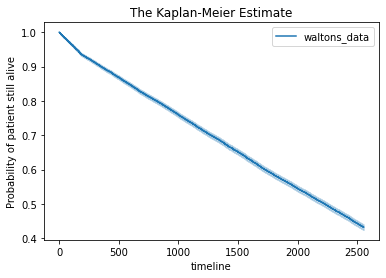

In [162]:
# Plot the graph :
kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probability of patient still alive")
plt.show()

The confidence interval gives us the range of values we are fairly sure our true values lie in. Here you can see in the above graph the light blue color shade represents the confidence interval of survival. From that, we can say that the probability at that timeline certainly lies between that confidence interval only.

In [163]:
print (kmf.confidence_interval_)

        waltons_data_lower_0.95  waltons_data_upper_0.95
0.0                    0.999480                 0.999967
1.0                    0.999132                 0.999825
2.0                    0.998709                 0.999604
3.0                    0.998303                 0.999363
4.0                    0.997674                 0.998954
...                         ...                      ...
2551.0                 0.424982                 0.440639
2552.0                 0.424852                 0.440509
2553.0                 0.424658                 0.440313
2554.0                 0.424463                 0.440118
2555.0                 0.424463                 0.440118

[2470 rows x 2 columns]


          waltons_data
timeline              
0.0           0.000130
1.0           0.000390
2.0           0.000715
3.0           0.001040
4.0           0.001560
...                ...
2551.0        0.567176
2552.0        0.567306
2553.0        0.567501
2554.0        0.567696
2555.0        0.567696

[2470 rows x 1 columns]


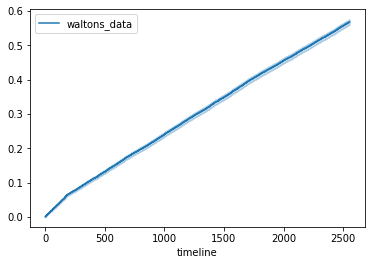

In [164]:
# Probabaility of die :
# p(1022) = p(0) +......+p(2555)
print (kmf.cumulative_density_)

# Plot the graph :
kmf.plot_cumulative_density()

          NA_estimate
timeline             
0.0          0.000130
1.0          0.000390
2.0          0.000715
3.0          0.001040
4.0          0.001561
...               ...
2551.0       0.837381
2552.0       0.837681
2553.0       0.838132
2554.0       0.838583
2555.0       0.838583

[2470 rows x 1 columns]


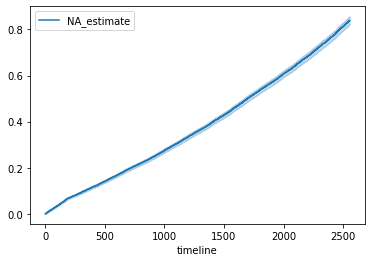

In [165]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(df["time"],event_observed = df["dead"])
print (naf.cumulative_hazard_)
naf.plot()



In [166]:
# We can predict the value of a certain point :
print (naf.predict(365))

0.10879314776794935


# Cox's Propotional Hazard

In [207]:
df.shape

(15385, 10)

In [208]:
dummies_stage = pd.get_dummies(df["stage"], prefix = 'stage')
dummies_stage.head(4)

# df1 = pd.get_dummies(df[['stage','TNM_sc']])
# df1

,stage_I,stage_IIA,stage_IIB,stage_III,stage_IV
0,1,0,0,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0


In [209]:
dummies_TNM = pd.get_dummies(df["TNM_sc"], prefix = 'TNM')
dummies_TNM.head(4)

,TNM_I,TNM_IIA,TNM_IIB,TNM_IIC,TNM_III,TNM_IIIA,TNM_IIIB,TNM_IIIC,TNM_IV,TNM_IVA,TNM_IVB
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0


In [210]:
dummies_TNM = dummies_TNM[["TNM_I", "TNM_IIA", "TNM_IIB", "TNM_IIC", "TNM_IIIA", "TNM_IIIB", "TNM_IIIC", "TNM_IVA", "TNM_IVB"]]
data = pd.concat([df, dummies_stage ,dummies_TNM], axis = 1)
data = data.drop(["stage","TNM_sc"], axis = 1)
data.head()

,rd_thrpy,rad_rem,survival_1_year,age,survival_7_years,race4,time,dead,stage_I,stage_IIA,...,stage_IV,TNM_I,TNM_IIA,TNM_IIB,TNM_IIC,TNM_IIIA,TNM_IIIB,TNM_IIIC,TNM_IVA,TNM_IVB
0,0,1,1,86.0,0,1,1166,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,1,66.0,0,0,1227,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,1,1,84.0,1,1,2555,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,86.0,0,0,43,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,78.0,0,1,505,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [212]:
data.dropna(inplace=True)

In [213]:
data.columns

Index(['rd_thrpy', 'rad_rem', 'survival_1_year', 'age', 'survival_7_years',
       'race4', 'time', 'dead', 'stage_I', 'stage_IIA', 'stage_IIB',
       'stage_III', 'stage_IV', 'TNM_I', 'TNM_IIA', 'TNM_IIB', 'TNM_IIC',
       'TNM_IIIA', 'TNM_IIIB', 'TNM_IIIC', 'TNM_IVA', 'TNM_IVB'],
      dtype='object')

In [214]:
data.shape

(14637, 22)

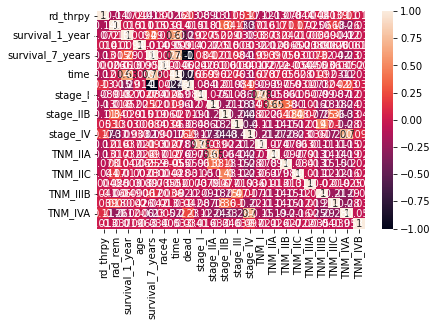

In [215]:

matrix = data.corr()
sns.heatmap(matrix, annot=True)
plt.show()

In [216]:
matrix

,rd_thrpy,rad_rem,survival_1_year,age,survival_7_years,race4,time,dead,stage_I,stage_IIA,...,stage_IV,TNM_I,TNM_IIA,TNM_IIB,TNM_IIC,TNM_IIIA,TNM_IIIB,TNM_IIIC,TNM_IVA,TNM_IVB
rd_thrpy,1.000000,-0.142777,-0.072397,0.013816,-0.132097,-0.000263,-0.120090,0.132097,-0.089241,-0.127030,...,0.170026,-0.118014,-0.132811,-0.077895,-0.043641,-0.004842,0.040973,0.039162,0.114677,0.012823
rad_rem,-0.142777,1.000000,0.014559,0.010869,0.014512,0.003609,0.014056,-0.014512,-0.018062,-0.015696,...,-0.367670,0.016382,0.016654,0.099870,0.170479,0.024544,-0.065859,0.184983,-0.255941,-0.037173
survival_1_year,-0.072397,0.014559,1.000000,0.009399,0.294928,0.013054,0.630273,-0.294928,0.027446,0.052368,...,-0.093358,0.037047,0.032130,0.041892,0.017498,0.003041,0.049302,0.000425,-0.116295,-0.019036
age,0.013816,0.010869,0.009399,1.000000,-0.014411,-0.009455,-0.008970,0.014411,-0.002720,-0.025217,...,0.003155,-0.021451,-0.026086,0.006501,-0.002280,-0.008865,-0.000673,0.026467,0.000611,0.006324
survival_7_years,-0.132097,0.014512,0.294928,-0.014411,1.000000,0.002406,0.758981,-1.000000,0.084304,0.118783,...,-0.192370,0.092642,0.096911,0.059111,0.030684,0.007268,0.117613,-0.041955,-0.234573,-0.033974
race4,-0.000263,0.003609,0.013054,-0.009455,0.002406,1.000000,0.004606,-0.002406,-0.002628,-0.010200,...,0.000171,-0.002717,-0.011771,-0.000022,-0.004433,0.005451,-0.003611,0.012708,0.005223,-0.004957
time,-0.120090,0.014056,0.630273,-0.008970,0.758981,0.004606,1.000000,-0.758981,0.069457,0.096045,...,-0.161767,0.077597,0.075685,0.054522,0.028368,0.010174,0.091917,-0.030634,-0.196676,-0.033127
dead,0.132097,-0.014512,-0.294928,0.014411,-1.000000,-0.002406,-0.758981,1.000000,-0.084304,-0.118783,...,0.192370,-0.092642,-0.096911,-0.059111,-0.030684,-0.007268,-0.117613,0.041955,0.234573,0.033974
stage_I,-0.089241,-0.018062,0.027446,-0.002720,0.084304,-0.002628,0.069457,-0.084304,1.000000,-0.074509,...,-0.167611,0.782026,-0.057590,-0.061181,-0.049535,-0.007875,-0.089786,-0.086617,-0.117093,-0.016261
stage_IIA,-0.127030,-0.015696,0.052368,-0.025217,0.118783,-0.010200,0.096045,-0.118783,-0.074509,1.000000,...,-0.344531,0.038737,0.650169,0.380857,-0.101821,-0.016188,-0.184558,-0.178044,-0.240688,-0.033425


In [217]:
data.drop('survival_7_years', axis=1,inplace = True)

In [219]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.1)
cph.fit(data, duration_col='time', event_col='dead', show_progress=True)
cph.print_summary()

Iteration 1: norm_delta = 2.06424, step_size = 0.9000, log_lik = -76613.27488, newton_decrement = 5360.74741, seconds_since_start = 0.3
Iteration 2: norm_delta = 1.00060, step_size = 0.9000, log_lik = -74008.06561, newton_decrement = 1179.37955, seconds_since_start = 0.6
Iteration 3: norm_delta = 0.18850, step_size = 0.9000, log_lik = -73175.21623, newton_decrement = 88.20600, seconds_since_start = 0.9
Iteration 4: norm_delta = 0.00760, step_size = 1.0000, log_lik = -73085.02227, newton_decrement = 0.13118, seconds_since_start = 1.2
Iteration 5: norm_delta = 0.00002, step_size = 1.0000, log_lik = -73084.89086, newton_decrement = 0.00000, seconds_since_start = 1.5
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, log_lik = -73084.89086, newton_decrement = 0.00000, seconds_since_start = 1.8
Convergence success after 6 iterations.


<lifelines.CoxPHFitter: fitted with 14637 total observations, 6337 right-censored observations>
             duration col = 'time'
                event col = 'dead'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 14637
number of events observed = 8300
   partial log-likelihood = -73084.89
         time fit was run = 2022-03-08 09:08:47 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
rd_thrpy          0.23       1.25       0.02             0.19             0.27                 1.20                 1.31
rad_rem           0.14       1.15       0.03             0.08             0.19                 1.08                 1.21
survival_1_year  -3.75       0.02       0.05            -3.85            -3.66                 0.02                 0.03
age               0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
race4            -0.01       0.99       0.02            -0.05             0.04                 0.95                 1.04
stage_I          -0.25       0.78       0.09            -0.42            -0.08                 0.66                 0.92
stage_IIA        -0.12       0.88       0.05            -0.22            -0.03                 0.80                 0.97
stage_IIB         0.02       1.03       0.04            -0.05             0.10                 0.95                 1.11
stage_III        -0.09       0.92       0.04            -0.17            -0.00                 0.85                 1.00
stage_IV          0.12       1.13       0.04             0.05             0.20                 1.05                 1.22
TNM_I            -0.17       0.84       0.07            -0.30            -0.04                 0.74                 0.96
TNM_IIA          -0.16       0.85       0.05            -0.27            -0.06                 0.76                 0.95
TNM_IIB          -0.06       0.94       0.05            -0.15             0.03                 0.86                 1.03
TNM_IIC          -0.09       0.92       0.05            -0.19             0.02                 0.83                 1.02
TNM_IIIA         -0.19       0.82       0.26            -0.70             0.32                 0.50                 1.37
TNM_IIIB         -0.21       0.81       0.04            -0.27            -0.14                 0.76                 0.87
TNM_IIIC          0.13       1.14       0.03             0.06             0.20                 1.06                 1.22
TNM_IVA           0.36       1.43       0.03             0.30             0.42                 1.35                 1.53
TNM_IVB           0.37       1.45       0.11             0.16             0.59                 1.17                 1.80

                     z      p   -log2(p)
covariate                               
rd_thrpy         10.80 <0.005      87.95
rad_rem           4.56 <0.005      17.57
survival_1_year -76.00 <0.005        inf
age               1.28   0.20       2.31
race4            -0.27   0.78       0.35
stage_I          -2.95 <0.005       8.29
stage_IIA        -2.50   0.01       6.35
stage_IIB         0.63   0.53       0.91
stage_III        -2.07   0.04       4.70
stage_IV          3.28 <0.005       9.92
TNM_I            -2.53   0.01       6.44
TNM_IIA          -3.01 <0.005       8.56
TNM_IIB          -1.26   0.21       2.26
TNM_IIC          -1.66   0.10       3.38
TNM_IIIA         -0.74   0.46       1.12
TNM_IIIB         -5.79 <0.005      27.08
TNM_IIIC          3.75 <0.005      12.47
TNM_IVA          11.09 <0.005      92.51
TNM_IVB           3.40 <0.005      10.53
---
Concordance = 0.69
Partial AIC = 146207.78
log-likelihood ratio test = 7056.77 on 19 df
-log2(p) of ll-ratio test = inf